In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot

%matplotlib inline

In [41]:
ads_data = pd.read_csv('./ads_data.csv')

In [42]:
ads_data.head()

ad_id        time event        date ad_cost_type  has_video  \
0   23456  1554076848  view  2019-04-01          CPM          0   
1  111941  1554135866  view  2019-04-01          CPM          0   
2  111941  1554135866  view  2019-04-01          CPM          0   
3   42987  1554135866  view  2019-04-01          CPM          0   
4   23456  1554135866  view  2019-04-01          CPM          0   

   client_union_id  campaign_union_id platform  ad_cost  \
0             5681              23456  android    190.0   
1           111793             111941      ios    215.2   
2           111793             111941      ios    215.2   
3            28541              42985      ios    199.1   
4             5681              23456      web    190.0   

   target_audience_count  user_id  
0                 125560      793  
1                  32277     1041  
2                  32277       41  
3                  80160      898  
4                 125560       29

In [1]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

NameError: name 'pd' is not defined

In [44]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [45]:
ads_data.head()

ad_id        time event       date ad_cost_type  has_video  \
0   23456  1554076848  view 2019-04-01          CPM          0   
1  111941  1554135866  view 2019-04-01          CPM          0   
2  111941  1554135866  view 2019-04-01          CPM          0   
3   42987  1554135866  view 2019-04-01          CPM          0   
4   23456  1554135866  view 2019-04-01          CPM          0   

   client_union_id  campaign_union_id platform  ad_cost  \
0             5681              23456  android    190.0   
1           111793             111941      ios    215.2   
2           111793             111941      ios    215.2   
3            28541              42985      ios    199.1   
4             5681              23456      web    190.0   

   target_audience_count  user_id           full_date  
0                 125560      793 2019-04-01 00:00:48  
1                  32277     1041 2019-04-01 16:24:26  
2                  32277       41 2019-04-01 16:24:26  
3                  80160      898 2019-04-01 16:24:26  
4                 125560       29 2019-04-01 16:24:26

In [46]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

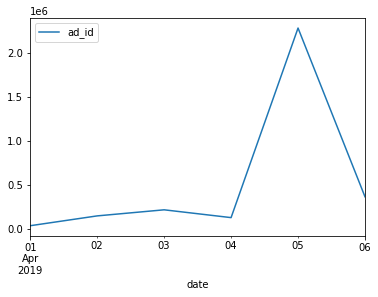

In [47]:
ads_data.groupby('date').agg({'ad_id' : 'count'}).plot()

In [53]:
ads_data_by_ad = ads_data.groupby(['date','event'],as_index=False).agg({'ad_id':'nunique'}).pivot(index='date',columns='event',values='ad_id').reset_index()

In [49]:
ads_data[ads_data.date == '2019-04-05'].groupby('ad_id').agg({'time':'count'}).sort_values('time', ascending=False).head()

time
ad_id          
112583  2166611
29927     27186
44635      8268
46583      7327
44956      5656

In [27]:
ads_data.query('ad_id == 112583').groupby('date').agg({'time' : 'count'})

time
date               
2019-04-05  2166611
2019-04-06   348613

In [57]:
ads_data_by_ad = ads_data.groupby(['ad_id','event'],as_index=False).agg({'time':'count'}).pivot(index='ad_id',columns='event',values='time').reset_index()

In [58]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [59]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event   ad_id     click       view       ctr    ctr_per
289    112583  580436.0  1934788.0  0.300000  29.999979
324    119450     258.0     1254.0  0.205742  20.574163
125     38575      43.0      257.0  0.167315  16.731518
144     40968      29.0      217.0  0.133641  13.364055
207     45642      42.0      344.0  0.122093  12.209302
283    110924      11.0       95.0  0.115789  11.578947
194     45043      28.0      245.0  0.114286  11.428571
96      35034     112.0      997.0  0.112337  11.233701
5        4585      53.0      476.0  0.111345  11.134454
328    120347     236.0     2168.0  0.108856  10.885609

In [60]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [62]:
ads_data_by_ad.ctr.median()

0.010753240746688594

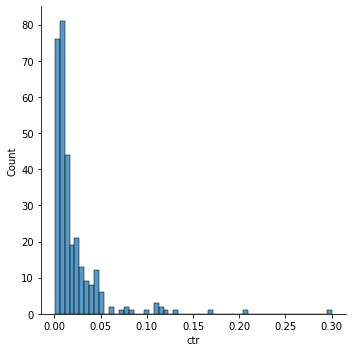

In [64]:
sns.displot(ads_data_by_ad.ctr,kde=False)

In [65]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [67]:
ads_ids_bug = ads_data_by_ad.query('click == 0').ad_id

In [74]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)].groupby('platform',as_index=False).agg({'ad_id':'count'}).sort_values('ad_id')

platform  ad_id
2      web   1988
1      ios   3075
0  android   4906

In [78]:
df_2019_04_04 = ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id','event'],as_index=False).agg({'time':'count'}).pivot(index='ad_id',columns='event',values='time').reset_index().fillna(0)

In [79]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [83]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [84]:
ads_data

ad_id        time  event       date ad_cost_type  has_video  \
0         23456  1554076848   view 2019-04-01          CPM          0   
1        111941  1554135866   view 2019-04-01          CPM          0   
2        111941  1554135866   view 2019-04-01          CPM          0   
3         42987  1554135866   view 2019-04-01          CPM          0   
4         23456  1554135866   view 2019-04-01          CPM          0   
...         ...         ...    ...        ...          ...        ...   
3176709  112583  1554501092   view 2019-04-06          CPM          0   
3176710  112583  1554501092   view 2019-04-06          CPM          0   
3176711  112583  1554501092  click 2019-04-06          CPM          0   
3176712  112583  1554501092   view 2019-04-06          CPM          0   
3176713  112583  1554508770   view 2019-04-06          CPM          0   

         client_union_id  campaign_union_id platform  ad_cost  \
0                   5681              23456  android    190.0   
1                 111793             111941      ios    215.2   
2                 111793             111941      ios    215.2   
3                  28541              42985      ios    199.1   
4                   5681              23456      web    190.0   
...                  ...                ...      ...      ...   
3176709           111818             112260  android    199.4   
3176710           111818             112260  android    199.4   
3176711           111818             112260      web    199.4   
3176712           111818             112260      ios    199.4   
3176713           111818             112260      ios    199.4   

         target_audience_count  user_id           full_date  
0                       125560      793 2019-04-01 00:00:48  
1                        32277     1041 2019-04-01 16:24:26  
2                        32277       41 2019-04-01 16:24:26  
3                        80160      898 2019-04-01 16:24:26  
4                       125560       29 2019-04-01 16:24:26  
...                        ...      ...                 ...  
3176709                 239408     5467 2019-04-05 21:51:32  
3176710                 239408     2508 2019-04-05 21:51:32  
3176711                 239408     7896 2019-04-05 21:51:32  
3176712                 239408     4319 2019-04-05 21:51:32  
3176713                 239408     8298 2019-04-05 23:59:30  

[3176714 rows x 13 columns]

In [94]:
ads_data[(ads_data.ad_cost_type == 'CPC') & (ads_data.event == 'click')].groupby('platform').agg({'ad_id':'count'})

ad_id
platform       
android     845
ios         506
web         323

In [91]:
ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].ad_cost.sum()/1000

497090.6778000003

In [98]:
ads_data[(ads_data.ad_cost_type == 'CPM') & (ads_data.event == 'view')].groupby('platform').agg({'ad_id':'count'})

ad_id
platform         
android   1251235
ios        749749
web        500378

In [100]:
ads_data.groupby(['ad_id', 'event'],as_index=False).agg({'time':'min'}).pivot(index='ad_id',columns='event',values='time').reset_index().query('click < view')

event   ad_id         click          view
27      16548  1.554336e+09  1.554336e+09
81      30939  1.554165e+09  1.554173e+09
138     40464  1.554164e+09  1.554164e+09
158     42007  1.554423e+09  1.554423e+09
185     44543  1.554336e+09  1.554337e+09
201     45436  1.554336e+09  1.554336e+09
324    119450  1.554336e+09  1.554336e+09